# NLP를 활용한 레시피 추천 챗봇 구현
**개요**
- Collection 
- Preprocessing
- EDA
- Embeddings
- Modeling
- Streamlit

## 3.EDA

### 라이브러리 import

In [1]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.graph_objs as go
from plotly.subplots import make_subplots

### 시각화 테마 설정

In [2]:
# 스타일, 폰트 등 지정
sns.set_style('dark')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# retina 설정
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# 색상 코드 지정
green_code = ['#228B22', '#64ae64']
blue_code = ['#688BB3', '#8AB9CE']

In [5]:
# 팔레트 지정
sns.set_palette('pastel')

### 데이터 불러오기

In [6]:
# 데이터 불러오기
df = pd.read_csv('data/preprocessed_recipes.csv')
df.shape

(4340, 10)

In [7]:
# 데이터 구성 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요리      4340 non-null   object
 1   종류      4340 non-null   object
 2   난이도     4340 non-null   int64 
 3   소요시간    4340 non-null   int64 
 4   링크      4340 non-null   object
 5   사진      4340 non-null   object
 6   재료      4340 non-null   object
 7   요리방법    4340 non-null   object
 8   설명      4340 non-null   object
 9   재료수     4340 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 339.2+ KB


In [8]:
# 데이터 미리보기
display(df.head(2), df.tail(2))

,요리,종류,난이도,소요시간,링크,사진,재료,요리방법,설명,재료수
0,꼬시래기 물냉면,메인요리,1,20,https://wtable.co.kr/recipes/GdRMuEBF9nXVJAtqw...,https://static.wtable.co.kr/image/production/s...,달걀 매실청 용냉면육수 통깨 꼬시래기 오이 식초 참기름 쌈무 고추장,"['끓는 물에 소금, 식초, 꼬시래기를 넣어 30초 정도 데쳐주세요.\r\n(tip...","꼬시래기는 해조류의 한 종류인데요. 지방, 탄수화물 함량이 낮고 칼슘과 식이섬유를 ...",10
1,닭죽,메인요리,1,30,https://wtable.co.kr/recipes/QawUyVgt3e5wvCT9d...,https://static.wtable.co.kr/image/production/s...,다진당근 통깨 찹쌀밥 통마늘 참기름 닭가슴살,"['냄비에 물과 닭가슴살, 마늘, 대파를 넣고 15분간 삶아주세요. ', '삶은 닭...",아플 때나 기운이 없을 때 간단히 끓여 먹기 좋은 닭죽! 맛이 좋은 건 물론 속을 ...,6


,요리,종류,난이도,소요시간,링크,사진,재료,요리방법,설명,재료수
4338,고등어 강정,오븐 요리,2,30,https://wtable.co.kr/recipes/KeZoBFZT8b2iHPzfv...,https://static.wtable.co.kr/image/production/s...,전분가루 다진마늘 케첩 통깨 맛술 생강가루 순살고등어 식초 파채 올리고당 청주 고추...,"['순살 고등어는 한입 크기로 잘라 밑간 재료에 10분간 재워주세요.', '파채는 ...","고등어를 색다르게 즐기는 요리. 비린 맛이 하나도 없고, 매콤 달콤한 소스와 너무 ...",13
4339,대파그라탕,오븐 요리,1,30,https://wtable.co.kr/recipes/JyHPoLXkZ5m8Xu9rt...,https://static.wtable.co.kr/image/production/s...,코코넛밀크 뉴트리셔널이스트 대파 파슬리 디종머스타드 두유 타임,"['냄비에 비건 크림 재료를 붓고 약불에서 10분간 저어가며 끓여주세요.', '깨끗...","대파의 무한변신, 대파그라탕! 대파의 은은한 단맛과 향이 매력적인 요리인데요. 특히...",7


In [9]:
# 기술통계 확인
display(df.describe(), df.describe(include='O'))

,난이도,소요시간,재료수
count,4340.000000,4340.000000,4340.000000
mean,1.402995,35.340553,9.177419
std,0.537199,56.181579,3.701447
min,1.000000,0.000000,1.000000
25%,1.000000,20.000000,7.000000
50%,1.000000,30.000000,9.000000
75%,2.000000,40.000000,11.250000
max,3.000000,2200.000000,23.000000


,요리,종류,링크,사진,재료,요리방법,설명
count,4340,4340,4340,4340,4340,4340,4340
unique,2033,18,2089,2089,2073,2089,2089
top,멘보샤,메인요리,https://wtable.co.kr/recipes/ys56AHsWvZpDXNutu...,https://static.wtable.co.kr/image/production/s...,할라피뇨 다진마늘 라임 파슬리 적양파 아보카도 토마토,['아보카도는 칼집을 넣어준 후 반을 갈라서 씨를 빼고 속을 스푼으로 파내어주세요....,과카몰리를 만들 때는 잘 익은 아보카도를 사용해야 맛도 좋고 손질도 편해요. 아보카...
freq,7,913,6,6,6,6,6


In [10]:
# 결측치 확인
df.isnull().sum()

요리      0
종류      0
난이도     0
소요시간    0
링크      0
사진      0
재료      0
요리방법    0
설명      0
재료수     0
dtype: int64

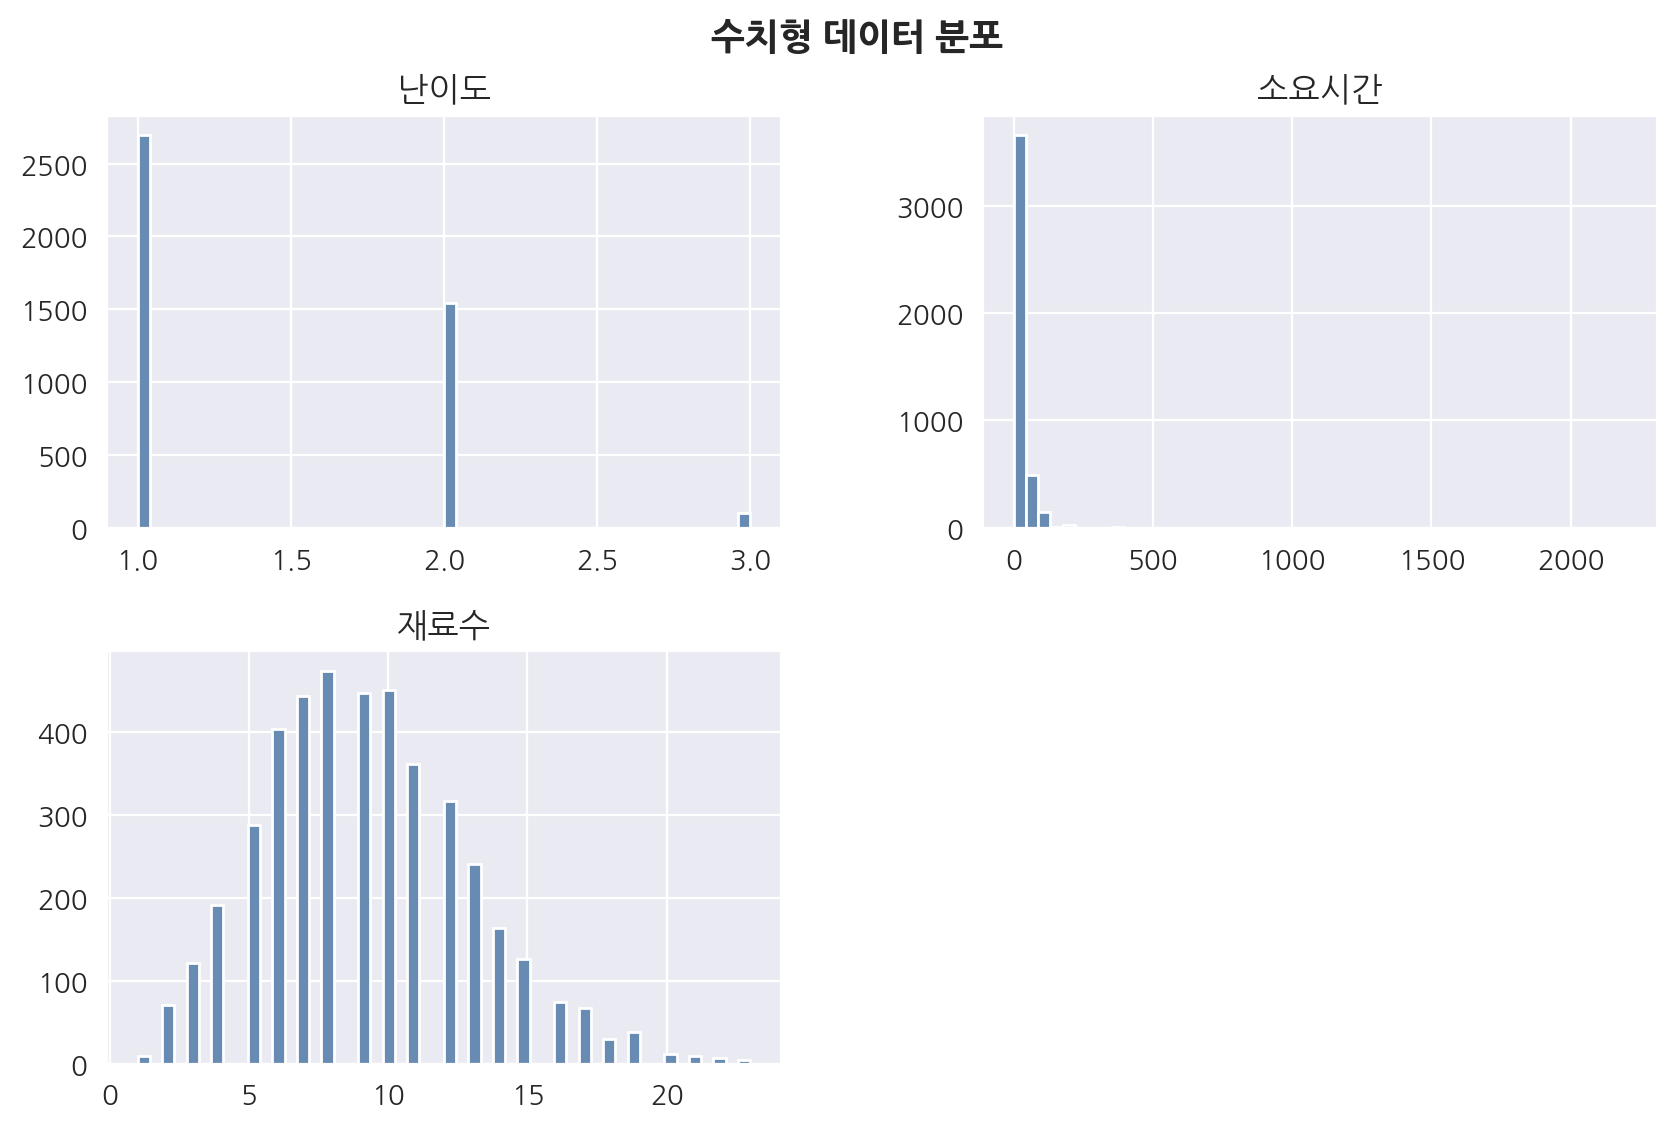

In [11]:
# 수치형 데이터 히스토그램
df.hist(bins=50, figsize=(10, 6), color=blue_code[0]);
plt.suptitle('수치형 데이터 분포', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

In [12]:
# 레시피 이름의 빈도수 확인
# 중복되는 레시피가 여럿 있음을 알 수 있음
# 추후 구현 시에 스트림릿의 위젯으로 필터링해줄 예정이므로 따로 제거하지는 않음
df['요리'].value_counts()

멘보샤              7
과카몰리             6
낫또 아보카도 덮밥       6
스키야키             6
두부가츠샌드위치         6
                ..
모과청              1
야생블루베리 파르페       1
야생블루베리 에이드       1
핫초코와 마시멜로 눈사람    1
고등어 강정           1
Name: 요리, Length: 2033, dtype: int64

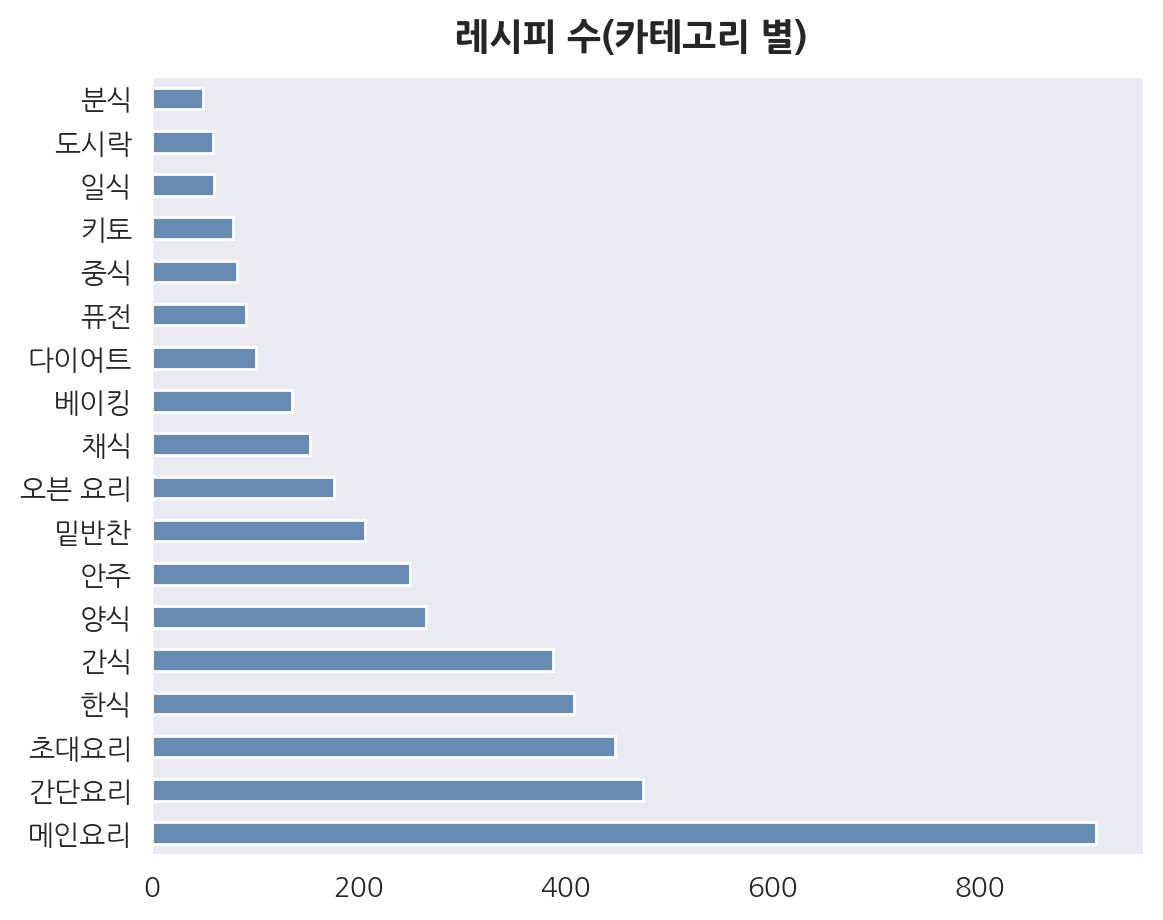

In [13]:
# 카테고리별 레시피 수 확인
df['종류'].value_counts().plot.barh(color=blue_code[0]);
plt.suptitle('레시피 수(카테고리 별)', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.92)
plt.show()

In [14]:
df['종류'].value_counts()

메인요리     913
간단요리     475
초대요리     448
한식       408
간식       388
양식       265
안주       250
밑반찬      206
오븐 요리    176
채식       153
베이킹      136
다이어트     101
퓨전        91
중식        82
키토        79
일식        60
도시락       59
분식        50
Name: 종류, dtype: int64

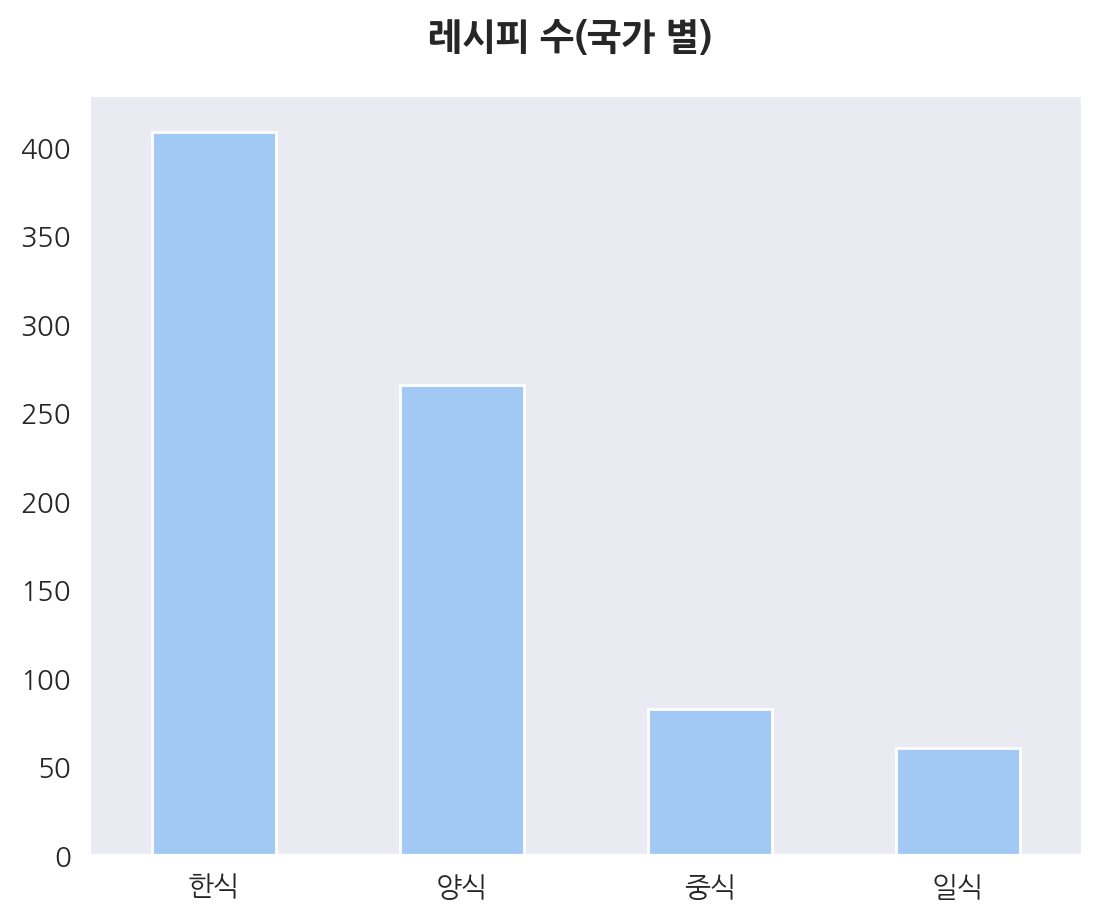

In [15]:
# 한식 중식 양식 일식만 보기
country = ['한식', '중식', '양식', '일식']
df.loc[df['종류'].isin(country)]['종류'].value_counts().plot.bar(rot=0);
plt.suptitle('레시피 수(국가 별)', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

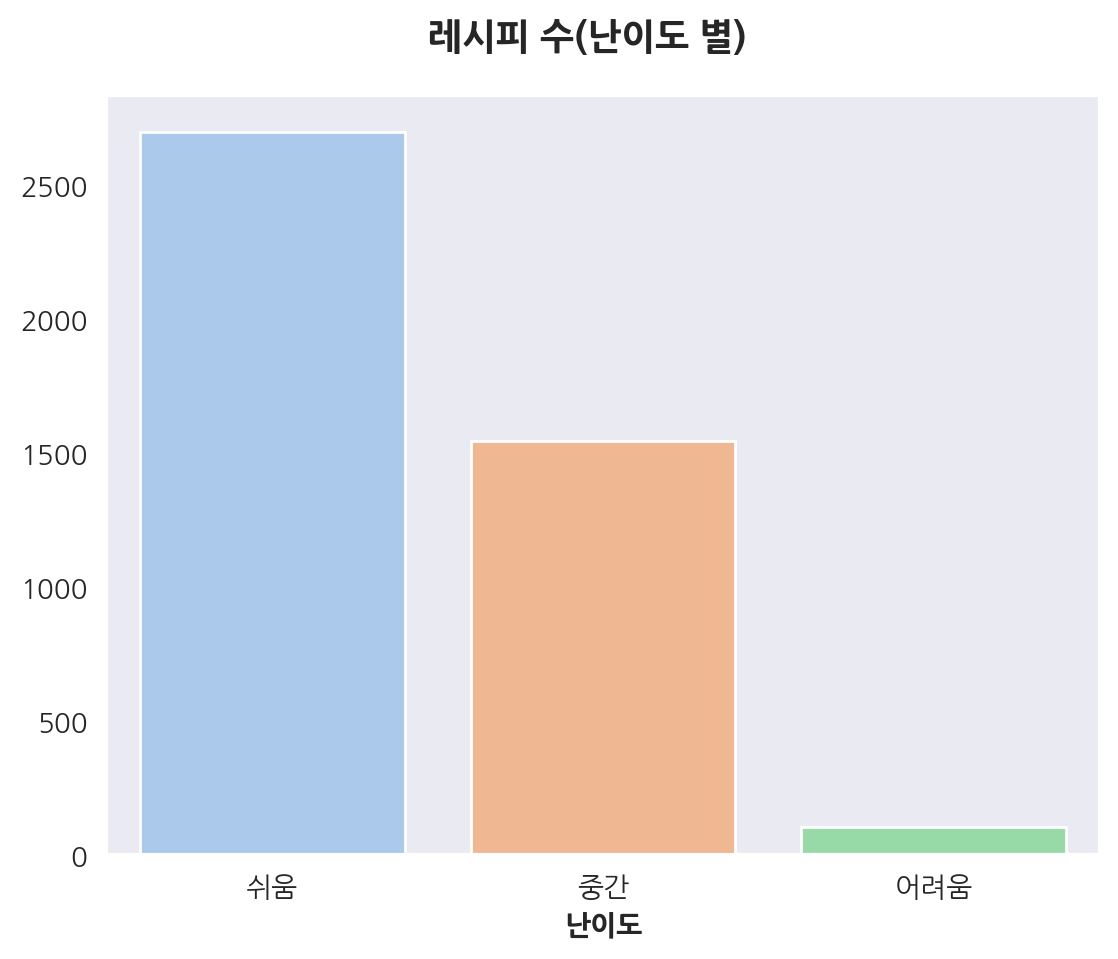

In [16]:
# 난이도별 레시피 분포 확인
# 난이도가 비교적 쉬운 레시피의 수가 많은 것을 알 수 있음
sns.countplot(data=df, x='난이도');
plt.suptitle('레시피 수(난이도 별)', fontsize=13, fontweight='bold')
plt.xlabel('난이도', fontweight='bold')
plt.ylabel('')
plt.xticks(ticks=[0, 1, 2], labels=['쉬움', '중간', '어려움'])
plt.subplots_adjust(top=0.9)
plt.show()

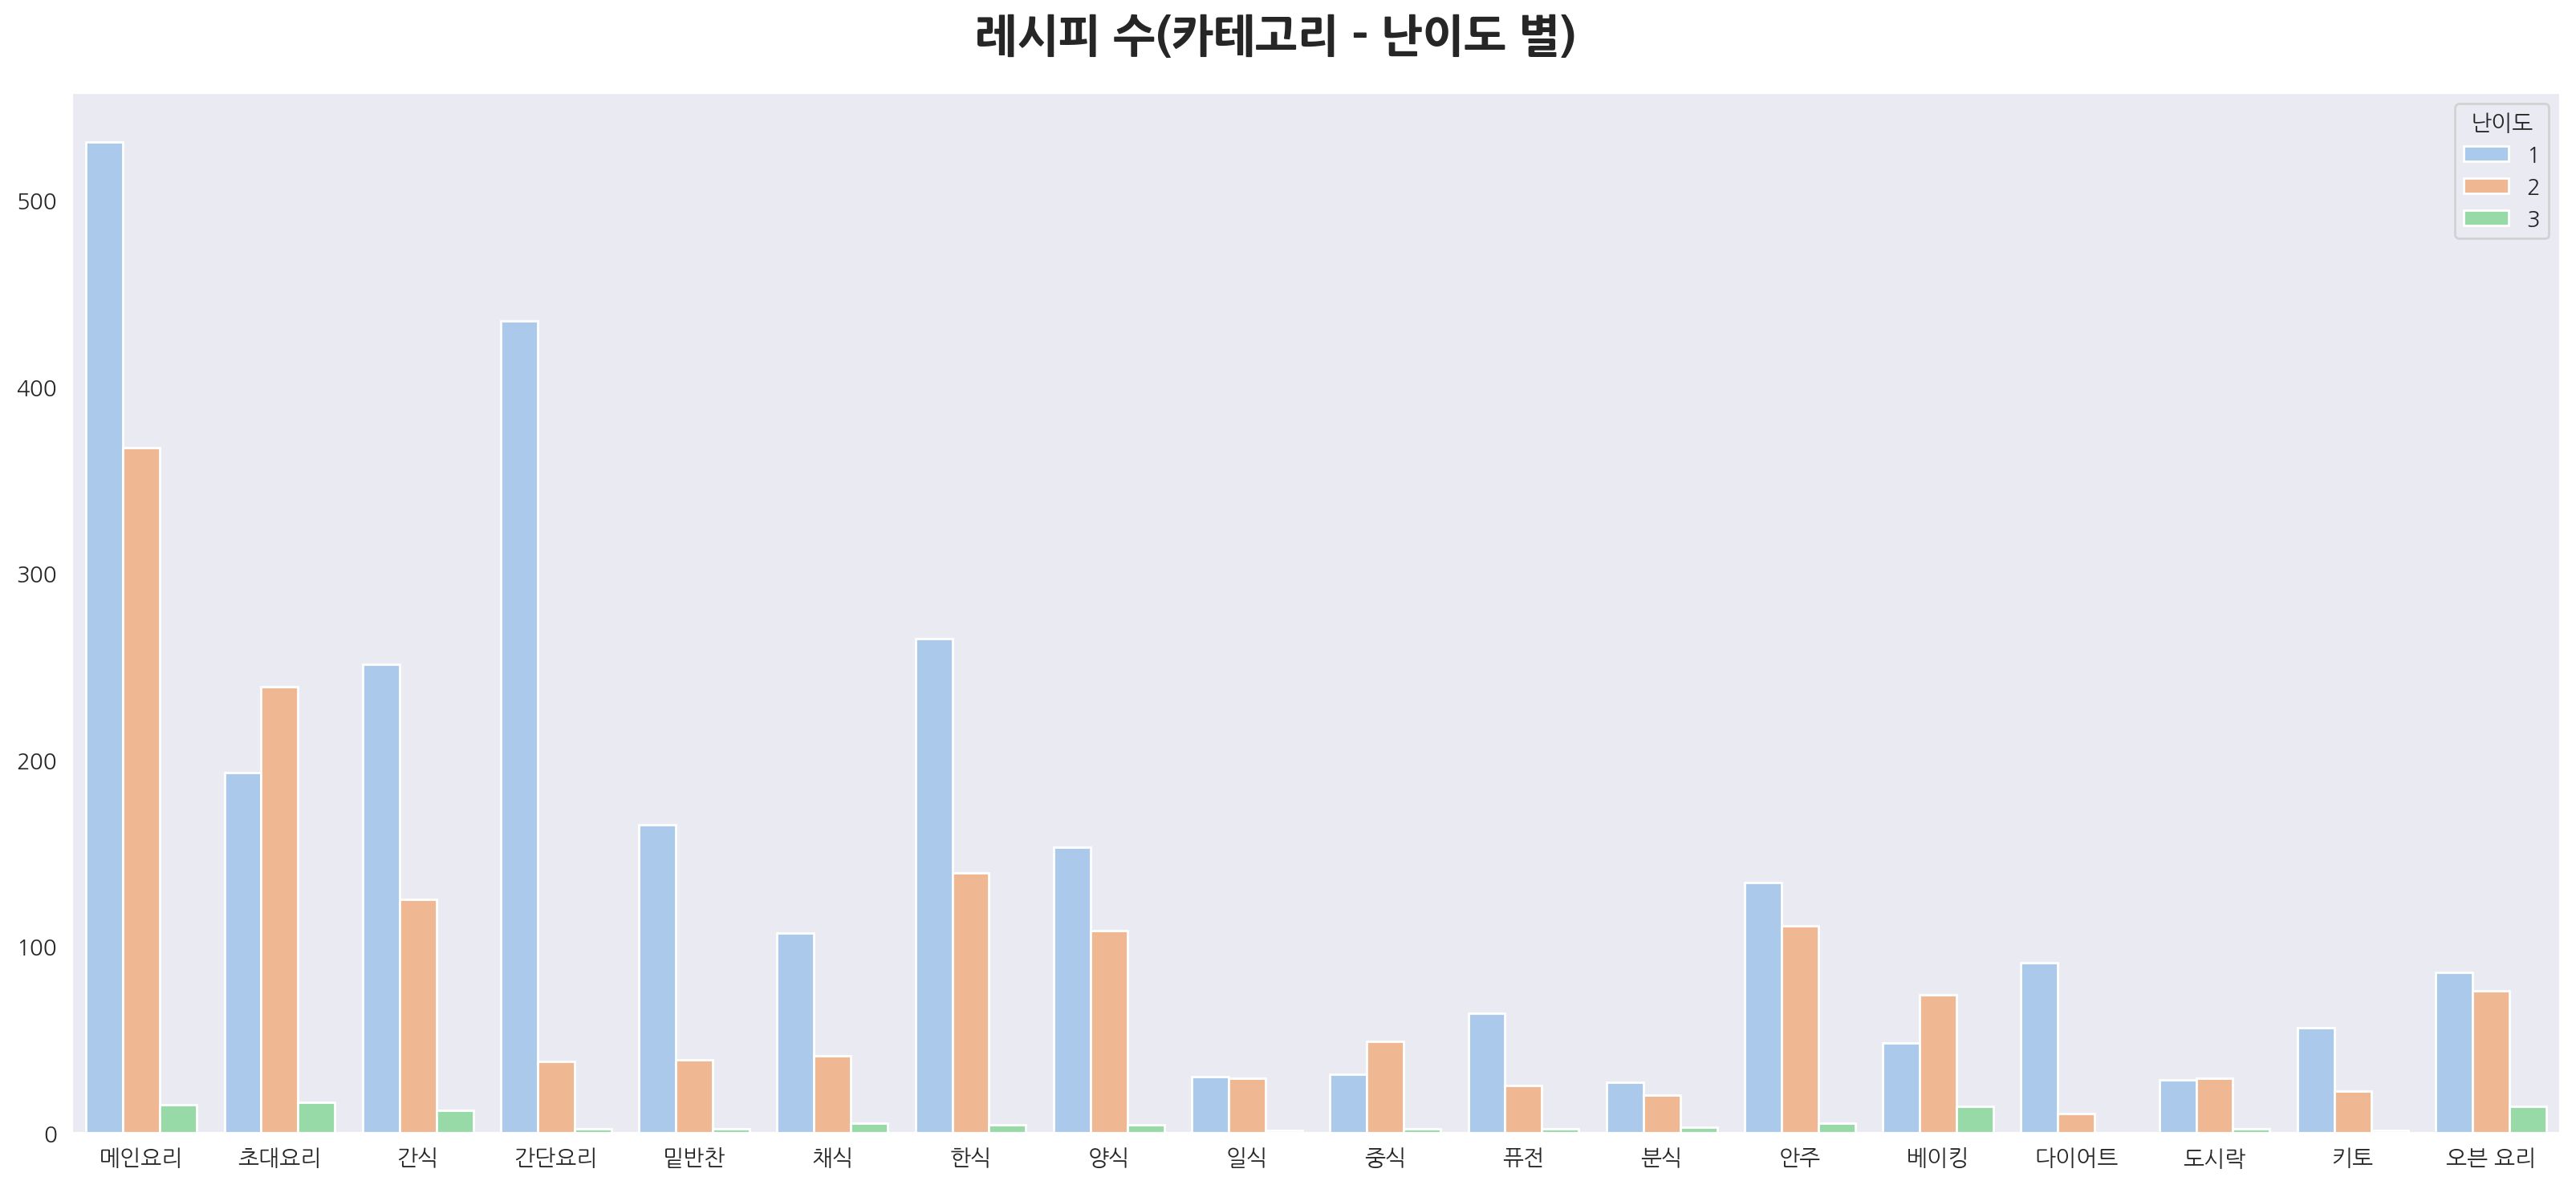

In [17]:
# 카테고리 별 난이도의 분포 확인
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='종류', hue='난이도');
plt.suptitle('레시피 수(카테고리 - 난이도 별)', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(top=0.92)
plt.show()

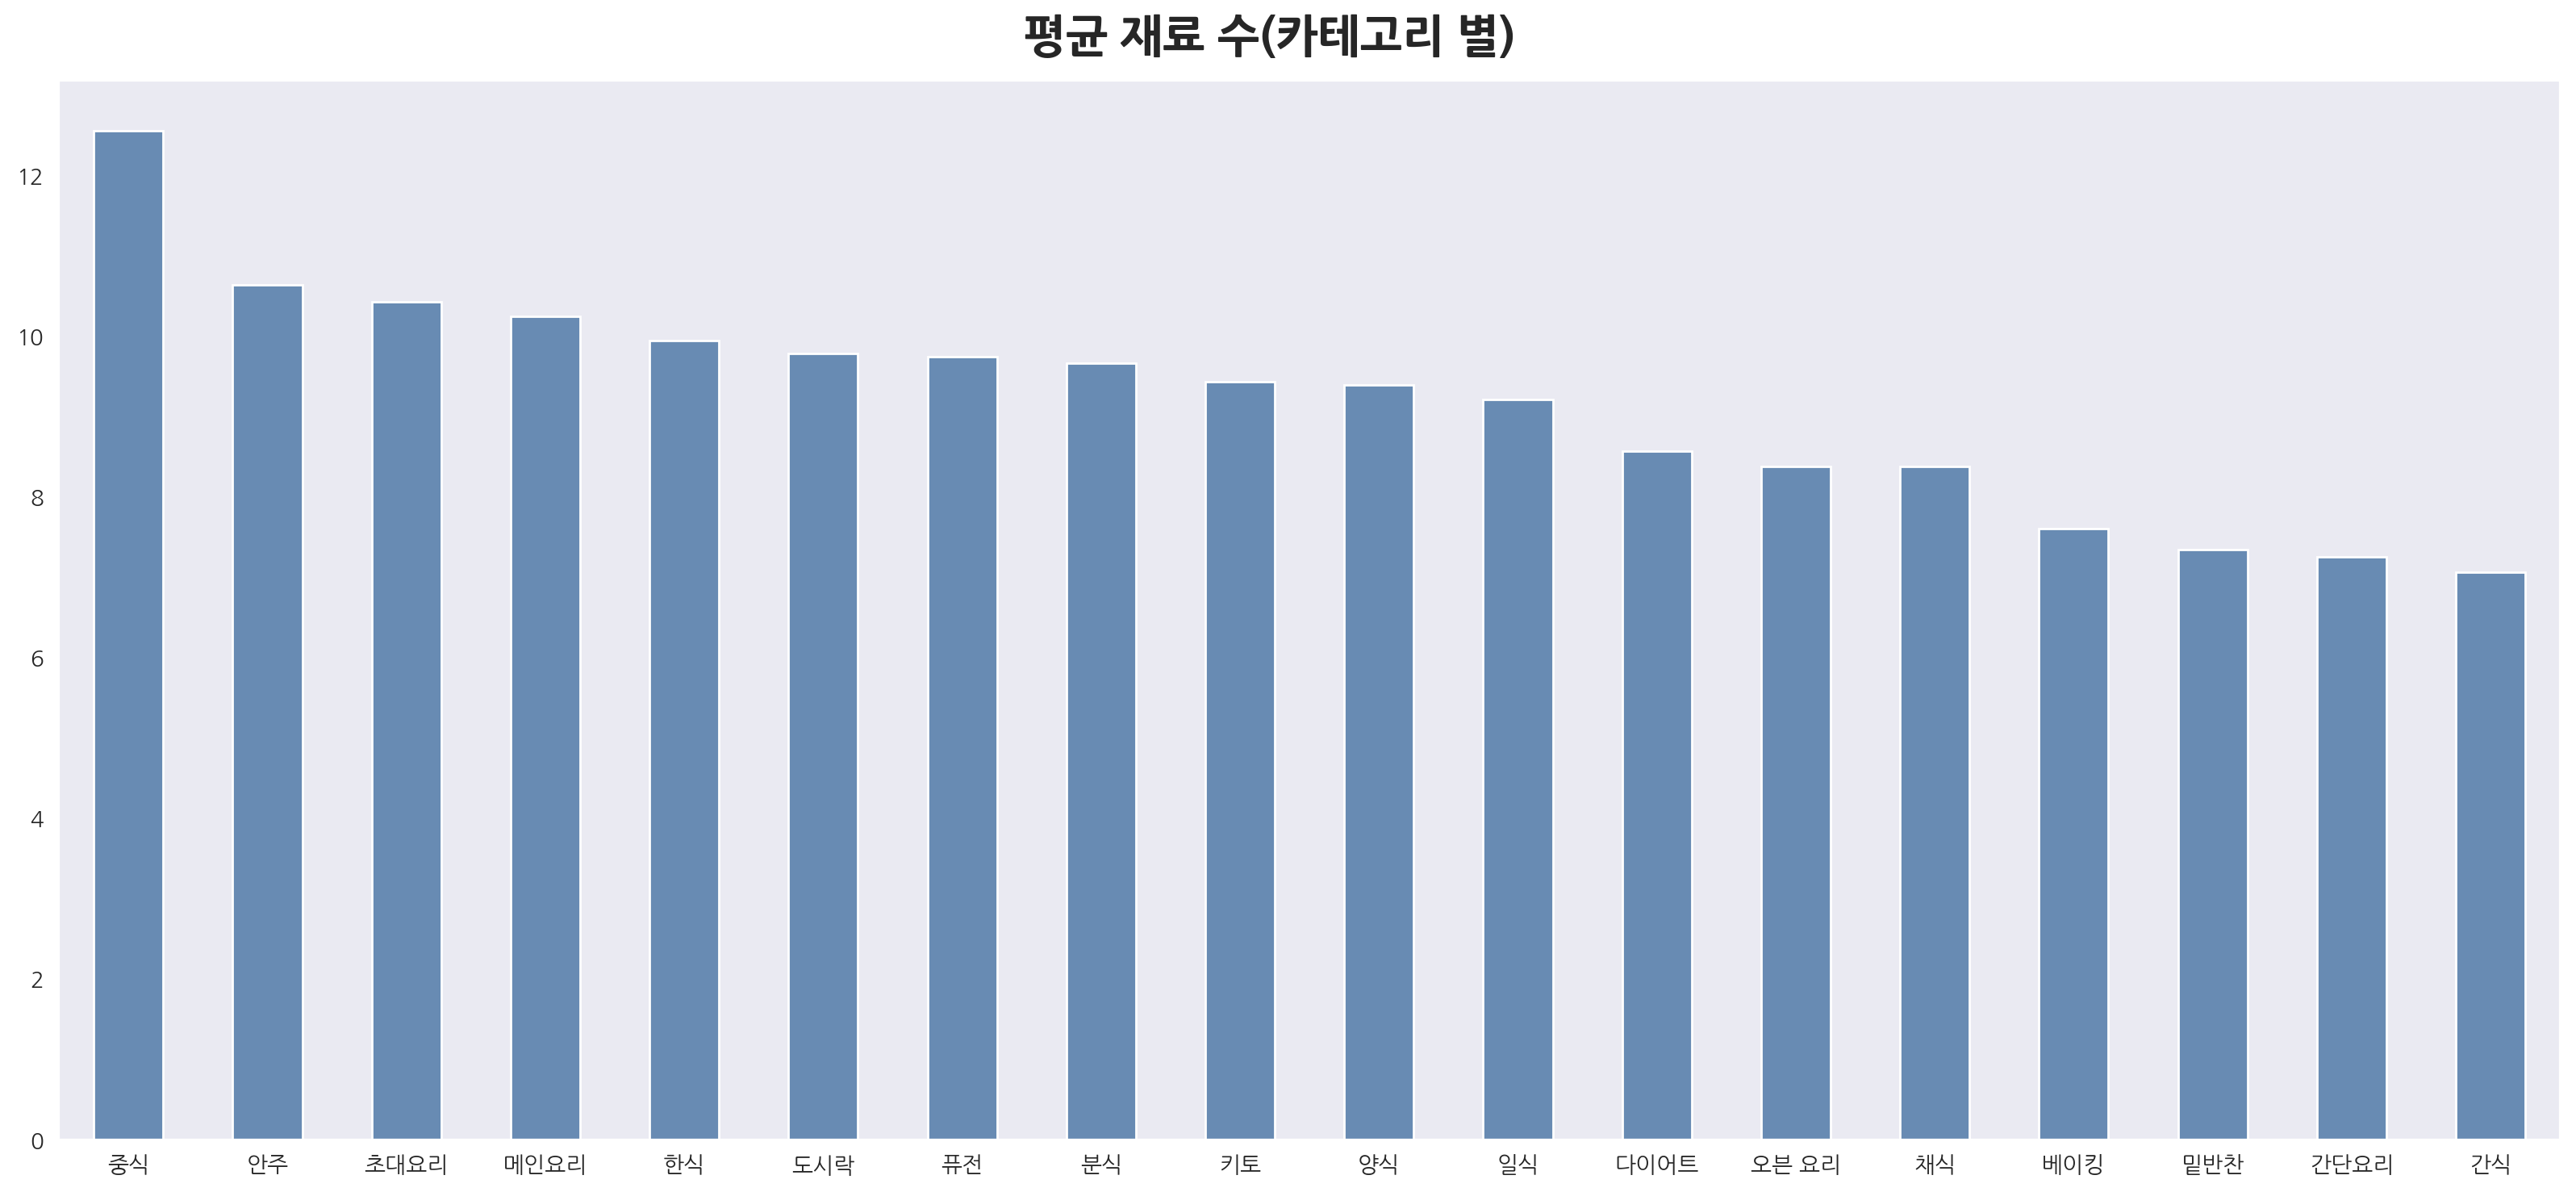

In [18]:
# 카테고리별 평균 재료수
plt.figure(figsize=(20,8))
df.groupby('종류')['재료수'].mean().sort_values(ascending=False).plot.bar(rot=0, color=blue_code[0]);
plt.suptitle('평균 재료 수(카테고리 별)', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.subplots_adjust(top=0.93)
plt.show()

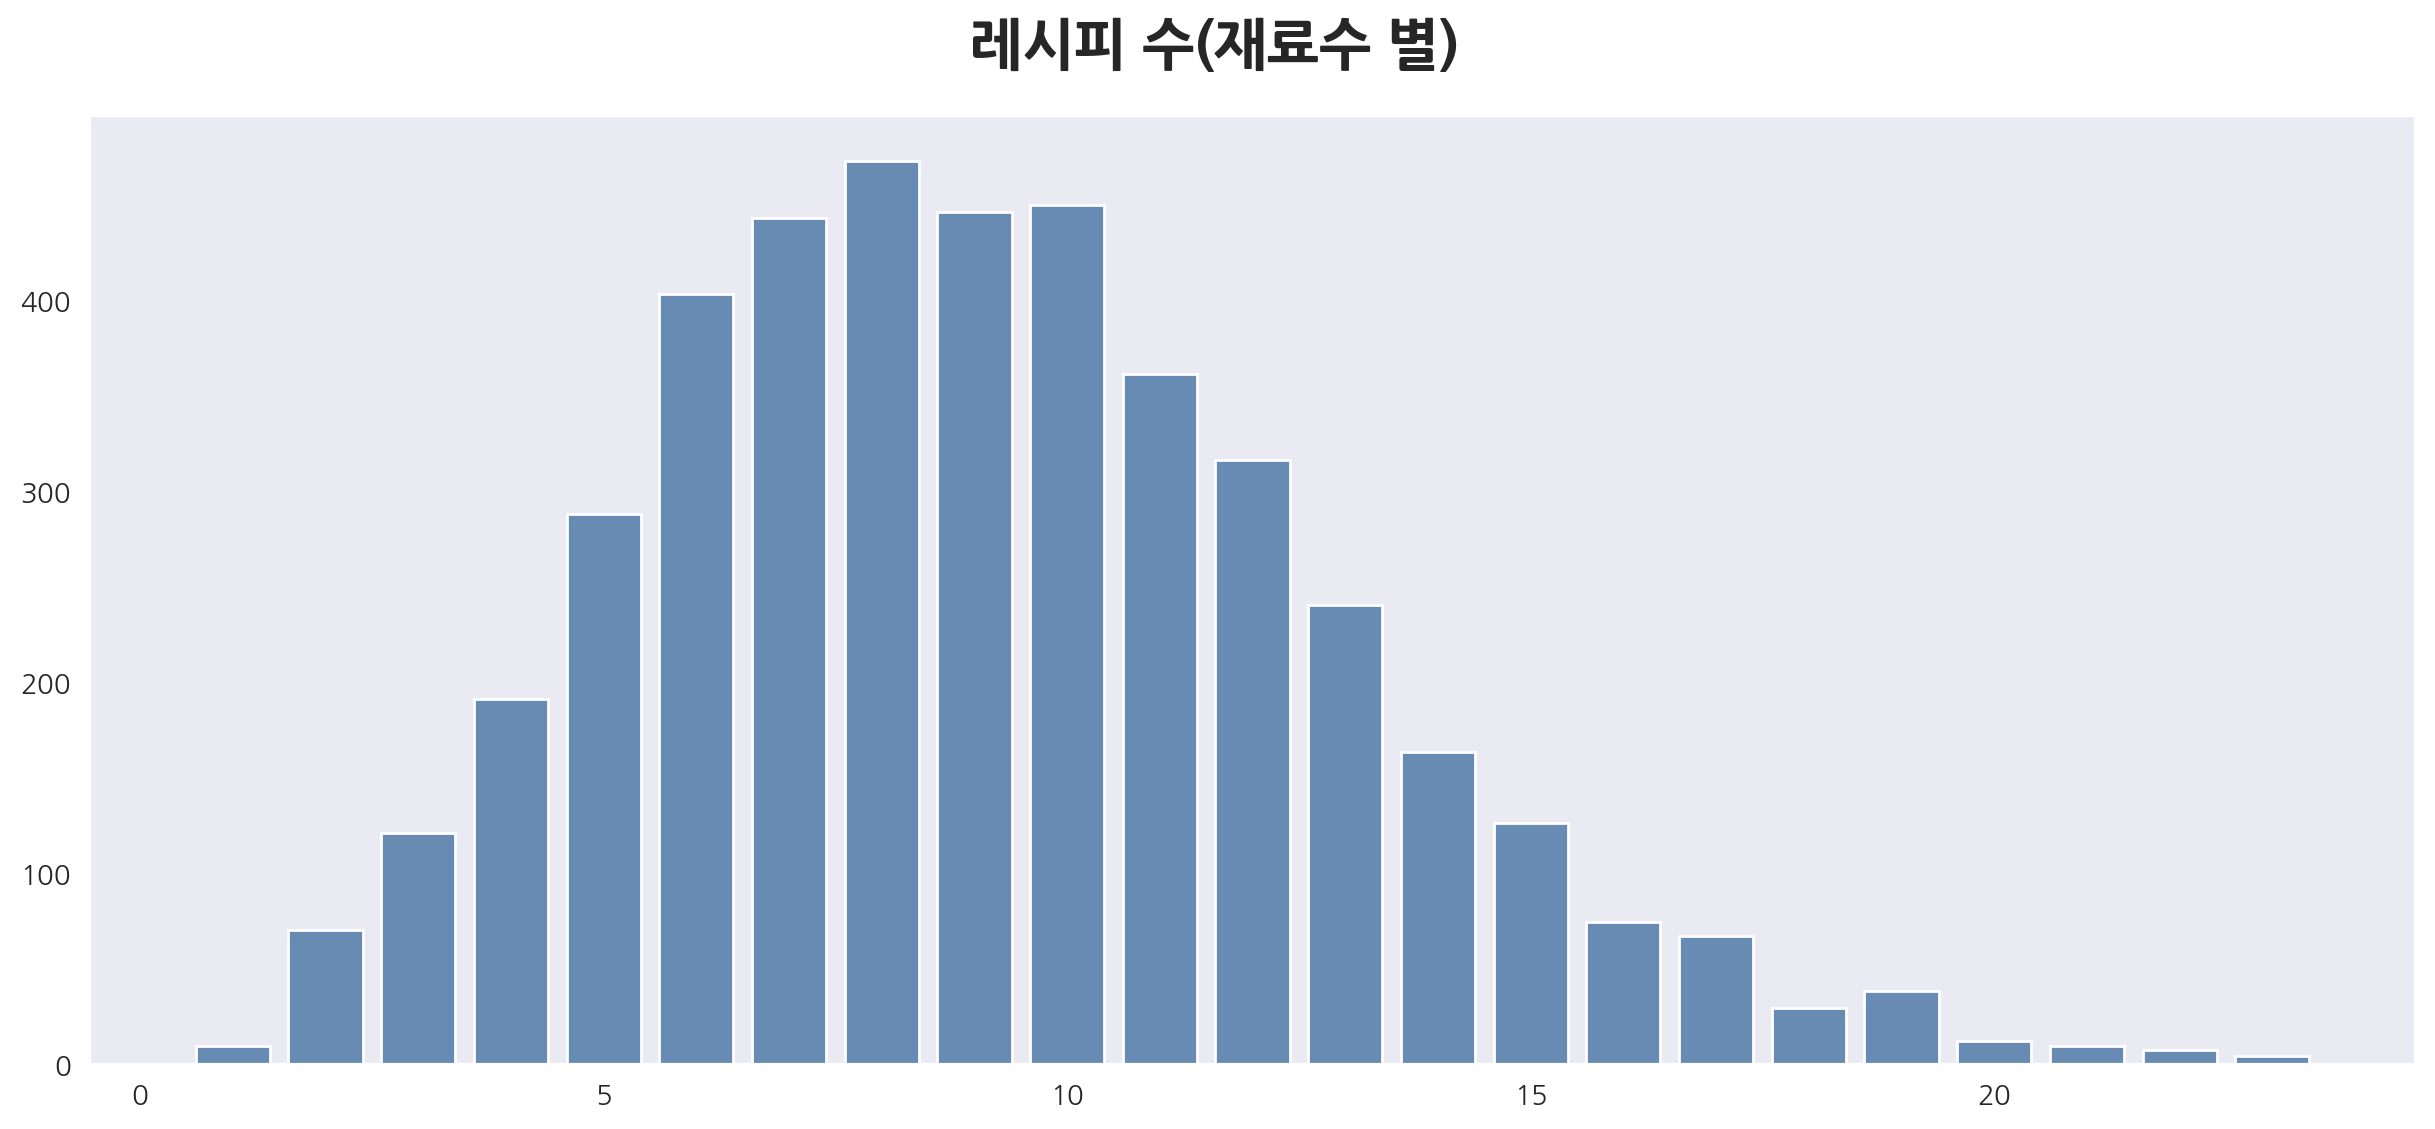

In [19]:
# 전체 레시피의 필요 재료수
ing_counts = df['재료수'].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ing_counts.index, ing_counts.values, color=blue_code[0])
plt.suptitle('레시피 수(재료수 별)', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show() 